In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
crickets = pd.DataFrame(ground_cricket_data)

In [4]:
feature_cols = ['Chirps/Second']
temps = ['Ground Temperature']
X = crickets[feature_cols]
y = crickets[temps]

linreg = LinearRegression()
linreg.fit(X, y)


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

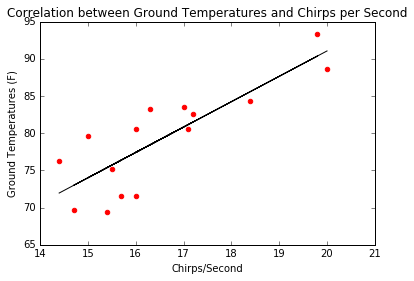

In [5]:
plt.scatter(X, y,  color='red')
plt.plot(X, linreg.predict(X), color='black', linewidth=1)
plt.title('Correlation between Ground Temperatures and Chirps per Second')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperatures (F)')
plt.show()

In [6]:
print('R-squared:', linreg.score(X, y))
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

R-squared: 0.692294652915
Intercept: [ 22.84898231]
Coefficient: [[ 3.410323]]


In [7]:
print("Predicted chirps/second if ground temp was 95: ", (95 - 22.84898231) / 3.410323)
print("Predicted ground temp if chirps/second was 18: ",linreg.predict([[18]]))

Predicted chirps/second if ground temp was 95:  21.15665222619676
Predicted ground temp if chirps/second was 18:  [[ 84.2347963]]


The Correlation between Ground Temperatures and Chirps per Second graph and R-squared score of 0.69 show that, while there is a correlation between ground temp and chips per second, it's not significant enough to be considered a strong correlation.

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

In [8]:
brain = pd.read_fwf("brain_body.txt")
brain.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [9]:
feature_cols = ['Brain']
body = ['Body']
X = brain[feature_cols]
y = brain[body]

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

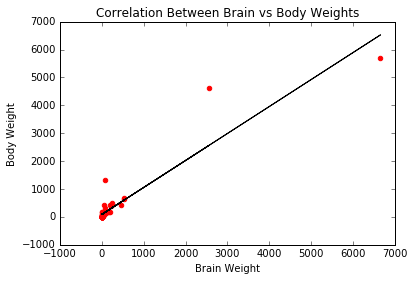

In [10]:
plt.scatter(X, y,  color='red')
plt.plot(X, linreg.predict(X), color='black', linewidth=1)
plt.title('Correlation Between Brain vs Body Weights')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [11]:
print('R-squared:', linreg.score(X, y))

R-squared: 0.872662084304


The graph showing the Correlation Between Brain vs Body Weights and a 0.87 R-squared score display a fairly strong correlation between brain weight and body weight.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

In [12]:
discrimination = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
discrimination.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [13]:
feature_cols = ["Sex", "Rank", "Year", "Degree", "YSdeg"]
salary = ["Salary"]
X = discrimination[feature_cols]
y = discrimination[salary]

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print('R-squared:', linreg.score(X, y))

R-squared: 0.854718067441


In [16]:
r_scores = []
num_series = []
from itertools import combinations
for i in range(len(feature_cols)):
    for p in combinations(feature_cols, i+1):
        q = list(p)
        x = discrimination[q]
        y = discrimination[['Salary']]
        linreg = linear_model.LinearRegression()
        result = linreg.fit(x, y)
        r_scores.append(linreg.score(x,y))
        num_series.append(i+1)
    
print(max(r_scores))

0.854718067441


The R-squared score for the salary discrimination data set implies that there is a strong correlation between Sex, Rank, Year, Degree, YSdeg and Salary. However, this is not to say that the correltion is strictlly because of gender but Rank, Year, Degree and Years Since Degree do play into this correlation as well. 